Simple Linear Regression

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model

In [145]:
gdp = pd.read_csv("gdp_per_capita.csv",sep='\t', encoding='latin1', na_values="NA").dropna()
gdp.head()


,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","3,995.383",2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","4,318.135",2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","4,100.315",2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","14,414.302",2011.0


In [138]:
oced = pd.read_csv("oecd.csv") [['Country','Indicator','Measure','Inequality','Unit','PowerCode','Value']]
oced.head()

,Country,Indicator,Measure,Inequality,Unit,PowerCode,Value
0,Australia,Labour market insecurity,Value,Total,Percentage,Units,5.4
1,Austria,Labour market insecurity,Value,Total,Percentage,Units,3.5
2,Belgium,Labour market insecurity,Value,Total,Percentage,Units,3.7
3,Canada,Labour market insecurity,Value,Total,Percentage,Units,6.0
4,Czech Republic,Labour market insecurity,Value,Total,Percentage,Units,3.1


In [139]:
gdp.describe()


,Estimates Start After
count,187.000000
mean,1969.032086
std,291.914056
min,0.000000
25%,2011.000000
50%,2013.000000
75%,2014.000000
max,2015.000000


In [140]:
oced.describe()

,Value
count,2368.000000
mean,4515.713518
std,36704.187536
min,0.000000
25%,6.760000
50%,58.200000
75%,85.000000
max,769053.000000


In [141]:
# Get countries + Life satisfaction
oced = oced[['Country','Value']][oced['Indicator'] == 'Life satisfaction']
oced =oced.rename(columns={'Value': 'Life satisfaction'})
oced.head()

,Country,Life satisfaction
1812,Australia,7.3
1813,Austria,7.1
1814,Belgium,6.9
1815,Canada,7.4
1816,Czech Republic,6.7


In [146]:
# Get countries + GDP from gdp
gdp  = gdp [['Country','2015']]
gdp = gdp.rename(columns = {'2015':'Gross Per Capita (GDP)'})
gdp['Gross Per Capita (GDP)'] = pd.to_numeric(gdp['Gross Per Capita (GDP)'].str.replace(',', ''),errors ='coerce')
gdp = gdp[gdp['Gross Per Capita (GDP)'] <= 60000]
gdp.head()

,Country,Gross Per Capita (GDP)
0,Afghanistan,599.994
1,Albania,3995.383
2,Algeria,4318.135
3,Angola,4100.315
4,Antigua and Barbuda,14414.302


In [147]:
gdp['Country'] = gdp['Country'].str.strip()
oced['Country'] = oced['Country'].str.strip()

In [168]:
country_stats = pd.merge(gdp,oced, on ='Country'). groupby(['Country']).mean().reset_index()
country_stats.head()

,Country,Gross Per Capita (GDP),Life satisfaction
0,Australia,50961.865,7.350
1,Austria,43724.031,7.225
2,Belgium,40106.632,7.000
3,Brazil,8669.998,6.400
4,Canada,43331.961,7.425


Data Visualiztion for the GDP on x -axis and life expectation on the y-axis

In [196]:
X = country_stats['Gross Per Capita (GDP)'].values.reshape(-1,1)
y = country_stats['Life satisfaction'].values.reshape(-1,1)
X.shape,y.shape

((37, 1), (37, 1))

Visualization of Data 

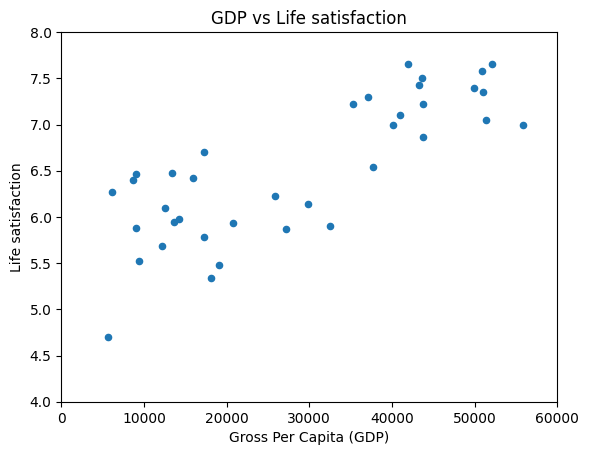

In [189]:
country_stats.plot(kind ='scatter',title= "GDP vs Life satisfaction", x= "Gross Per Capita (GDP)", y="Life satisfaction", xlim =(0, 60000),ylim =(4,8))
plt.show()

Selecting a linear model

In [190]:
model = sklearn.linear_model.LinearRegression()

In [193]:
model.fit(X,y)

LinearRegression()

making a prediction

In [194]:
X_new =[[22587]] # cyprus GDP
print(model.predict(X_new))

[[6.2910907]]


In [195]:
y_hat = model.predict(X)

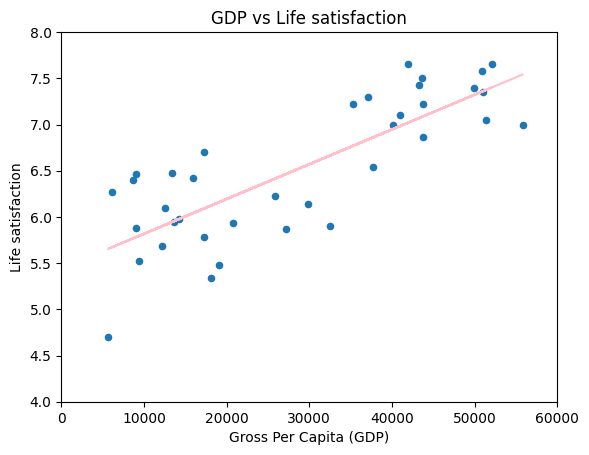

In [199]:
country_stats.plot(kind ='scatter',title= "GDP vs Life satisfaction", x= "Gross Per Capita (GDP)", y="Life satisfaction", xlim =(0, 60000),ylim =(4,8))
plt.plot(X,y_hat, c='pink')
plt.show()